In [1]:
import numpy as np
import hicplotlib as hpl
import matplotlib.pyplot as plt
import seaborn as sns #Recommend upgrading to new seaborn 0.6
import pandas as pd
from __future__ import division
sns.set_color_codes()
%pylab inline
#I suggest you run it without inline mode as this way figures are quite cluttered

Populating the interactive namespace from numpy and matplotlib


In [2]:
settings = hpl.HiCParameters()
settings.resolution=20000
settings.set_chromosomes(['chr2L', 'chr2R', 'chr3L', 'chr3R', 'chr4', 'chrX'])
settings.set_chromosomes_lengths([23011544, 21146708, 24543557, 27905053, 1351857, 22422827])
#Can be also done by parsing a file with chromosome names and lengths with settings.set_chromosomes_from_chrfile
gi = hpl.GenomicIntervals(settings)

Loading a Hi-C matrix, do it any way you prefer to get your data.

In [3]:
s2 = np.loadtxt('../../../Documents/biology/Drosophila_cells_Hi-C/S2/IC-heatmap-20K.mtx')

This is how it looks, just a symmetrical matrix. The diagonal has been removed here, so zeroes in the middle.

In [4]:
s2

array([[   0.        ,    0.        ,  260.9097313 , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    7.14010218,
           0.        ,    0.        ],
       [ 260.9097313 ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ..., 
       [   0.        ,    7.14010218,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

Now let's call the TADs. It is done via greendale (https://bitbucket.org/nvictus/greendale/) which needs to be installed separately. Let's first use Potts segmentation

In [5]:
s2_tads = gi.genome_intervals_to_chr(gi.find_TADs(s2, gammalist=list(np.linspace(0, 0.9, 10))+range(1, 10)+range(10, 155, 5), segmentation='potts'))
s2_tads['Segmentation'] = 'Potts'

And now let's try Armatus segmentation (implementation of the Armatus algorithm from (Filippova et al, 2013). This takes much longer.

In [6]:
s2_tads_arm = gi.genome_intervals_to_chr(gi.find_TADs(s2, gammalist=list(np.linspace(0, 0.9, 10))+range(1, 10)+range(10, 155, 5), segmentation='armatus'))
s2_tads_arm['Segmentation'] = 'Armatus'

Let's now have a look at those TADs.

In [17]:
s2_tads.reset_index(drop=True)

,Chromosome,Start,End,Gamma,Segmentation
0,chrX,20000,22420000,0.2,Potts
1,chr2L,0,22980000,0.3,Potts
2,chr2R,0,21120000,0.3,Potts
3,chr3L,20000,24520000,0.3,Potts
4,chr3R,0,27880000,0.3,Potts
5,chr4,60000,1280000,0.3,Potts
6,chr2L,0,22980000,0.4,Potts
7,chr2R,0,21120000,0.4,Potts
8,chr3L,20000,24520000,0.4,Potts
9,chr3R,0,27880000,0.4,Potts


In [18]:
s2_tads_arm.reset_index(drop=True)

,Chromosome,Start,End,Gamma,Segmentation
0,chr2L,0,120000,0,Armatus
1,chr2L,120000,420000,0,Armatus
2,chr2L,420000,500000,0,Armatus
3,chr2L,520000,2200000,0,Armatus
4,chr2L,2200000,2740000,0,Armatus
5,chr2L,2740000,2860000,0,Armatus
6,chr2L,2880000,2980000,0,Armatus
7,chr2L,2980000,3040000,0,Armatus
8,chr2L,3060000,3460000,0,Armatus
9,chr2L,3480000,4820000,0,Armatus


Seems like it worked, but we only saw the head and tail of the tables... Let's just now see some statistics across all gamma values we used. Coverage shows percentage of the genome covered by TADs.

In [19]:
gi.describe_TADs(s2_tads)

,count,median,mean,amin,amax,coverage
Gamma,,,,,,
0.2,1,22400000,22400000,22400000,22400000,0.186075
0.3,5,22980000,19540000,1220000,27880000,0.811586
0.4,5,22980000,19540000,1220000,27880000,0.811586
0.5,5,22980000,19540000,1220000,27880000,0.811586
0.6,5,22980000,19540000,1220000,27880000,0.811586
0.7,8,15580000,15012500,1220000,24500000,0.997661
0.8,8,15580000,15012500,1220000,24500000,0.997661
0.9,8,15580000,15012500,1220000,24500000,0.997661
1.0,9,12960000,13344444,1220000,22400000,0.997661


In [20]:
gi.describe_TADs(s2_tads_arm)

,count,median,mean,amin,amax,coverage
Gamma,,,,,,
0.0,179,140000,661564.245810,60000,27880000,0.983706
0.1,402,140000,289850.746269,60000,22400000,0.967922
0.2,546,120000,210659.340659,60000,2460000,0.955462
0.3,611,120000,187168.576105,60000,1980000,0.949979
0.4,656,120000,173414.634146,60000,1980000,0.944995
0.5,686,120000,165335.276968,60000,1580000,0.942171
0.6,733,100000,153860.845839,60000,1580000,0.936855
0.7,778,100000,144832.904884,60000,1420000,0.936024
0.8,828,100000,136183.574879,60000,1420000,0.936688


Nice! Now let's visualise some of these things nicely.

In [21]:
s2_tads_all = pd.concat([s2_tads, s2_tads_arm])
s2_tads_all.sort(['Segmentation', 'Gamma', 'Chromosome', 'Start', 'End'], inplace=True)

In [22]:
s2_tads_all['Length'] = s2_tads_all['End'].astype(int)-s2_tads_all['Start'].astype(int)

Let's see how many TADs we get depending on gamma and segmentation method.

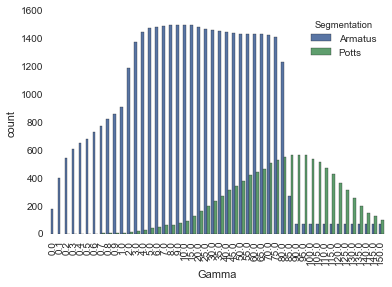

In [23]:
sns.countplot(x='Gamma', hue='Segmentation', data=s2_tads_all)
plt.xticks(rotation=90)
plt.show()

Let's compare the lengthes of TADs depending on gamma with these two segmentation methods.

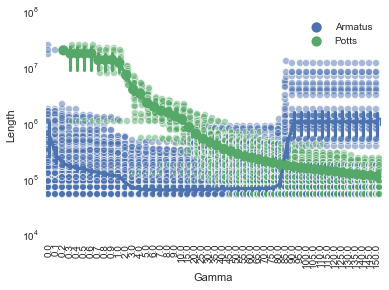

In [24]:
sns.pointplot(x='Gamma', y='Length', hue='Segmentation', data=s2_tads_all, zorder=15)
sns.stripplot(x='Gamma', y='Length', hue='Segmentation', data=s2_tads_all, jitter=True, zorder=1, alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels() #Have to do this because of some weird legend creation otherwise...
plt.legend(handles[:2], labels[:2], loc='upper right')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

Now calculating TAD borders strength. Let's use pandas.groupby.

Strength by default is calculated as ratio of sum of intra-TAD interactions of two neighbouring TADs to inter-TAD interactions of those TADs with each other.

In [25]:
s2_l = []
grouped = s2_tads_all.groupby(['Gamma', 'Segmentation'])
for (g, s), d in grouped:
    if len(d.index)>1:
        a = gi.get_borders_strength(d.copy(), s2)
    a['Gamma'] = g
    a['Segmentation'] = s
    s2_l.append(a)
s2_strengths_all = pd.concat(s2_l)

Now let's compare the strengths we are getting.

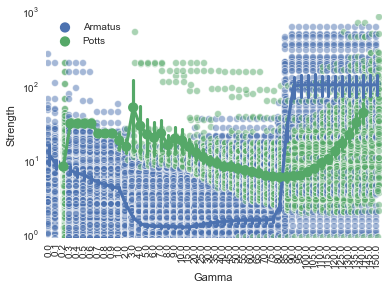

In [26]:
sns.pointplot(x='Gamma', y='Strength', hue='Segmentation', data=s2_strengths_all, zorder=15)
sns.stripplot(x='Gamma', y='Strength', hue='Segmentation', data=s2_strengths_all, jitter=True, zorder=1, alpha=0.5)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], loc='upper left')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

Make your own conclusions...